In [ ]:
!pip install arviz

In [ ]:
!pip install pymc3==3.8

     |████████████████████████████████| 911kB 8.4MB/s 
     |████████████████████████████████| 1.5MB 23.9MB/s 
     |████████████████████████████████| 4.7MB 44.0MB/s 
     |████████████████████████████████| 737kB 45.3MB/s 
     |████████████████████████████████| 296kB 45.1MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt

from scipy import stats
from scipy.special import expit as logistic

np.random.seed(123)

In [ ]:
iris = pd.read_csv('./sample_data/iris.csv')

df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes

# df = iris.query("variety == ('Setosa', 'Versicolor')")
# y_0 = pd.Categorical(df['variety']).codes

varnames = ['α', 'β', 'bd']

In [ ]:
# x_n = "sepal.length"
x_n = "sepal_length"
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    sd = pm.HalfNormal("sd", sd=1)

    μ = α + pm.math.dot(x_c, β)

    yl = pm.Normal('yl', mu=μ, sd=sd, observed=y_0)
    
    trace_linear = pm.sample(1000)
    
    posterior_predictive_linear = pm.sample_posterior_predictive(trace_linear)
    print(az.summary(trace_linear, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, β, α]
100%|██████████| 2000/2000 [00:04<00:00, 474.93it/s]
/usr/local/lib/python3.6/dist-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),


    mean     sd  hdi_3%  hdi_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
α   0.50  0.037   0.427    0.565  ...  2505.0    2587.0    1403.0    1.0
β   0.57  0.058   0.461    0.673  ...  2608.0    2608.0    1583.0    1.0
sd  0.35  0.026   0.304    0.398  ...  2545.0    2693.0    1550.0    1.0

[3 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


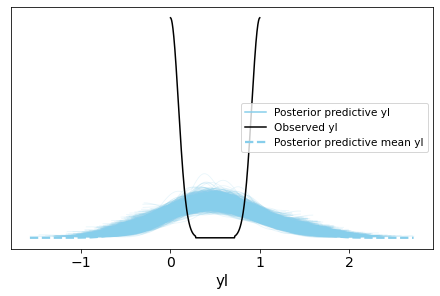

In [ ]:
data = az.from_pymc3(trace=trace_linear, posterior_predictive=posterior_predictive_linear)
az.plot_ppc(data,color= '#87ceeb');